In [2]:
from keras import models
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten
from keras.datasets import mnist, fashion_mnist
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
import numpy as np

In [11]:
(X_train_mnist, Y_train_mnist), (X_test_mnist, Y_test_mnist) = mnist.load_data()

Y_train_mnist = to_categorical(Y_train_mnist)
Y_test_mnist = to_categorical(Y_test_mnist)
print(Y_test_mnist)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(60000, 28, 28)


/home/anton/anaconda3/lib/python3.9/site-packages/matplotlib/text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


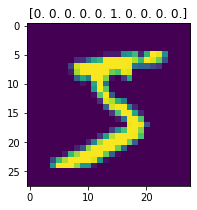

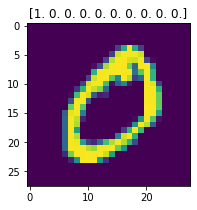

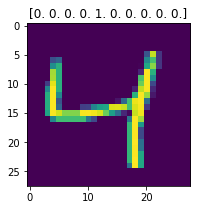

In [3]:
print(X_train_mnist.shape)

for i in range(3):
    plt.figure(figsize=(3, 3))
    plt.imshow(X_train_mnist[i])
    plt.title(Y_train_mnist[i])
    plt.show()

In [4]:
X_train_mnist = X_train_mnist.reshape(X_train_mnist.shape[0], X_train_mnist.shape[1], X_train_mnist.shape[2], 1)
X_test_mnist = X_test_mnist.reshape(X_test_mnist.shape[0], X_test_mnist.shape[1], X_test_mnist.shape[2], 1)

LeNet сеть

In [6]:
model_LeNet = models.Sequential()
model_LeNet.add(Conv2D(filters=6, kernel_size=(3, 3), activation='relu',
                       input_shape=(X_train_mnist.shape[1], X_train_mnist.shape[2], 1)))
model_LeNet.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_LeNet.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model_LeNet.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_LeNet.add(Flatten())
model_LeNet.add(Dense(120, activation='relu'))
model_LeNet.add(Dense(84, activation='relu'))
model_LeNet.add(Dense(10, activation='softmax'))
model_LeNet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_LeNet = model_LeNet.fit(X_train_mnist, Y_train_mnist, epochs=3,
                                validation_data=(X_test_mnist, Y_test_mnist))
model_LeNet.summary()

Epoch 1/3
1875/1875 [==============================] - 182s 97ms/step - loss: 1.0338 - accuracy: 0.8553 - val_loss: 0.0889 - val_accuracy: 0.9744
Epoch 2/3
1875/1875 [==============================] - 186s 99ms/step - loss: 0.0837 - accuracy: 0.9750 - val_loss: 0.0743 - val_accuracy: 0.9758
Epoch 3/3
1875/1875 [==============================] - 173s 92ms/step - loss: 0.0633 - accuracy: 0.9799 - val_loss: 0.0575 - val_accuracy: 0.9820
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 6)         60        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 16)        880       
_________________________________________________________________
max_pooling2

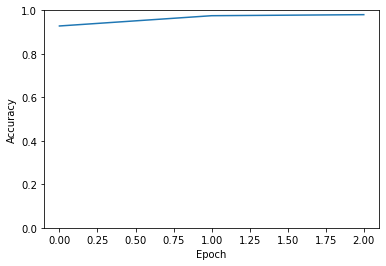

In [7]:
plt.plot(history_LeNet.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

In [8]:
my_model1 = models.Sequential()
my_model1.add(Conv2D(filters=10, kernel_size=(4, 4), activation='tanh',
                     input_shape=(X_train_mnist.shape[1], X_train_mnist.shape[2], 1)))
my_model1.add(MaxPooling2D(pool_size=(3, 3), strides=(1, 1)))
my_model1.add(Conv2D(filters=20, kernel_size=(4, 4), activation='tanh'))
my_model1.add(MaxPooling2D(pool_size=(3, 3), strides=(1, 1)))
my_model1.add(Flatten())
my_model1.add(Dense(10, activation='softmax'))
my_model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_1 = my_model1.fit(X_train_mnist, Y_train_mnist, epochs=3,
                          validation_data=(X_test_mnist, Y_test_mnist))
my_model1.summary()

Epoch 1/3
1875/1875 [==============================] - 215s 115ms/step - loss: 0.3018 - accuracy: 0.9069 - val_loss: 0.1717 - val_accuracy: 0.9528
Epoch 2/3
1875/1875 [==============================] - 220s 117ms/step - loss: 0.1147 - accuracy: 0.9684 - val_loss: 0.1154 - val_accuracy: 0.9694
Epoch 3/3
1875/1875 [==============================] - 272s 145ms/step - loss: 0.1069 - accuracy: 0.9717 - val_loss: 0.0943 - val_accuracy: 0.9779
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 25, 25, 10)        170       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 23, 10)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 20, 20, 20)        3220      
_________________________________________________________________
max_pooli

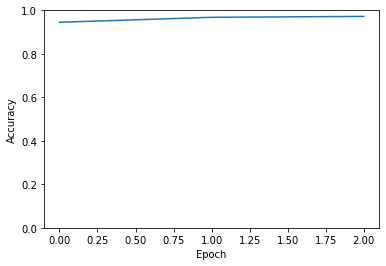

In [9]:
plt.plot(history_1.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

In [12]:
my_model2 = models.Sequential()

my_model2.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu',
                     input_shape=(X_train_mnist.shape[1], X_train_mnist.shape[2], 1)))
my_model2.add(MaxPooling2D(pool_size=(4, 4), strides=(4, 4)))
my_model2.add(Flatten())
my_model2.add(Dense(10, activation='softmax'))
my_model2.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

history = my_model2.fit(X_train_mnist, Y_train_mnist, epochs=3,
                        validation_data=(X_test_mnist, Y_test_mnist))

Epoch 1/3
1875/1875 [==============================] - 160s 85ms/step - loss: 10.9486 - accuracy: 0.6650 - val_loss: 0.3916 - val_accuracy: 0.9040
Epoch 2/3
1875/1875 [==============================] - 164s 87ms/step - loss: 0.3319 - accuracy: 0.9158 - val_loss: 0.2095 - val_accuracy: 0.9367
Epoch 3/3
1875/1875 [==============================] - 162s 87ms/step - loss: 0.1775 - accuracy: 0.9470 - val_loss: 0.1357 - val_accuracy: 0.9580


In [13]:
my_model2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 6, 6, 6)           0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 216)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                2170      
Total params: 2,326
Trainable params: 2,326
Non-trainable params: 0
_________________________________________________________________


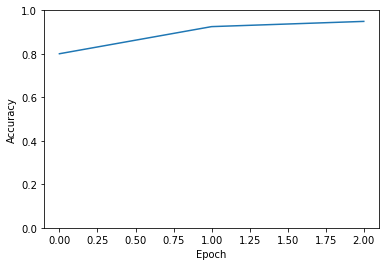

In [14]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

In [29]:
(X_train_fmnist, Y_train_fmnist), (X_test_fmnist, Y_test_fmnist) = fashion_mnist.load_data()
Y_matrix = Y_test_fmnist
Y_train_fmnist = to_categorical(Y_train_fmnist)
Y_test_fmnist = to_categorical(Y_test_fmnist)
print(Y_test_fmnist)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(60000, 28, 28)


/home/anton/anaconda3/lib/python3.9/site-packages/matplotlib/text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


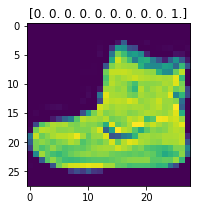

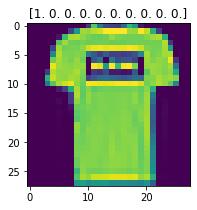

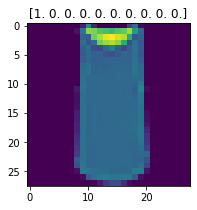

In [16]:
print(X_train_fmnist.shape)

for i in range(3):
    plt.figure(figsize=(3, 3))
    plt.imshow(X_train_fmnist[i])
    plt.title(Y_train_fmnist[i])
    plt.show()

In [35]:
X_train_fmnist = X_train_fmnist.reshape(X_train_fmnist.shape[0], X_train_fmnist.shape[1], X_train_fmnist.shape[2],
                                        1)  # 1 color chanel
X_test_fmnist = X_test_fmnist.reshape(X_test_fmnist.shape[0], X_test_fmnist.shape[1], X_test_fmnist.shape[2], 1)

In [19]:
history_LeNet_fmnist = model_LeNet.fit(X_train_fmnist, Y_train_fmnist, epochs=3,
                                       validation_data=(X_test_fmnist, Y_test_fmnist))

Epoch 1/3
1875/1875 [==============================] - 248s 132ms/step - loss: 0.4983 - accuracy: 0.8166 - val_loss: 0.4444 - val_accuracy: 0.8379
Epoch 2/3
1875/1875 [==============================] - 189s 101ms/step - loss: 0.3602 - accuracy: 0.8659 - val_loss: 0.3764 - val_accuracy: 0.8620
Epoch 3/3
1875/1875 [==============================] - 192s 103ms/step - loss: 0.3205 - accuracy: 0.8805 - val_loss: 0.3463 - val_accuracy: 0.8720


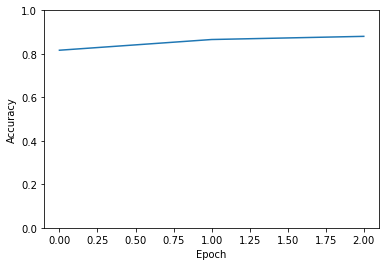

In [20]:
plt.plot(history_LeNet_fmnist.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

In [45]:
predictions_predict = model_LeNet.predict(X_test_fmnist)
predictions = list(map(np.argmax, predictions_predict))
print(predictions_predict)
confusion_matrix(Y_matrix, predictions)

[[1.85097156e-06 1.85316173e-06 6.28738235e-07 ... 3.44384112e-03
  1.12746214e-07 9.96149421e-01]
 [2.15097750e-03 3.70616253e-05 9.62089658e-01 ... 1.39311107e-09
  6.48304631e-05 5.31932241e-11]
 [3.95213588e-15 1.00000000e+00 3.29332590e-12 ... 1.11022682e-12
  2.03911588e-16 8.21102903e-19]
 ...
 [4.57447231e-06 1.51553249e-11 5.71477131e-06 ... 2.40833937e-12
  9.99974251e-01 1.13874622e-11]
 [1.39459646e-12 1.00000000e+00 2.14397441e-11 ... 9.86593945e-13
  2.54273436e-13 8.53984108e-20]
 [6.53480319e-03 1.16607337e-03 7.81514589e-03 ... 1.98237851e-01
  2.63687018e-02 1.75670777e-02]]


array([[815,   0,  13,  24,   4,   1, 137,   1,   5,   0],
       [  2, 966,   0,  19,   2,   0,   8,   0,   3,   0],
       [ 23,   1, 795,  12, 103,   0,  64,   0,   2,   0],
       [ 16,   3,   9, 900,  44,   0,  23,   0,   5,   0],
       [  0,   1, 104,  34, 764,   0,  95,   0,   2,   0],
       [  1,   0,   0,   0,   0, 967,   0,  22,   1,   9],
       [132,   2, 122,  28,  85,   0, 615,   0,  16,   0],
       [  0,   0,   0,   0,   0,  13,   0, 964,   0,  23],
       [  2,   0,   1,   4,   5,   3,  11,   2, 971,   1],
       [  1,   0,   0,   0,   0,   6,   0,  30,   0, 963]])

In [66]:
matrix_objects = [[0 for _ in range(10)] for _ in range(10)]
matrix_predictions = [[0 for _ in range(10)] for _ in range(10)]

for i in range(len(X_test_fmnist)):
    cur_object = Y_matrix[i]
    for j in range(10):
        if predictions_predict[i][j] > matrix_predictions[cur_object][j]:
            matrix_predictions[cur_object][j] = predictions_predict[i][j]
            matrix_objects[cur_object][j] = i

matrix_objects

[[6747, 3283, 8919, 3531, 9251, 751, 8059, 2872, 2599, 9017],
 [8074, 2, 6331, 787, 7876, 2396, 9832, 2396, 9485, 6331],
 [7369, 6852, 2868, 3457, 1374, 3082, 5125, 7073, 2503, 7073],
 [979, 2021, 9325, 6281, 2078, 8626, 1968, 5189, 7002, 1852],
 [4251, 8621, 5255, 3084, 6289, 3229, 6899, 3229, 5661, 3229],
 [2223, 6752, 2223, 6752, 5561, 384, 2223, 3253, 6165, 6061],
 [4727, 9991, 5594, 5006, 8005, 9199, 988, 6832, 9445, 6832],
 [5178, 5178, 5178, 5178, 5178, 9238, 5178, 7065, 5178, 2914],
 [3008, 2905, 4071, 2905, 5148, 669, 8568, 6565, 30, 4829],
 [5512, 477, 5512, 9193, 7931, 23, 5512, 5077, 5512, 2482]]

In [61]:
# 0 - Футболки / топы
# 1 - Шорты
# 2 - Свитер
# 3 - Платье
# 4 - Плащ
# 5 - Сандали
# 6 - Рубашка
# 7 - Кроссовки
# 8 - Сумка
# 9 - Ботинки

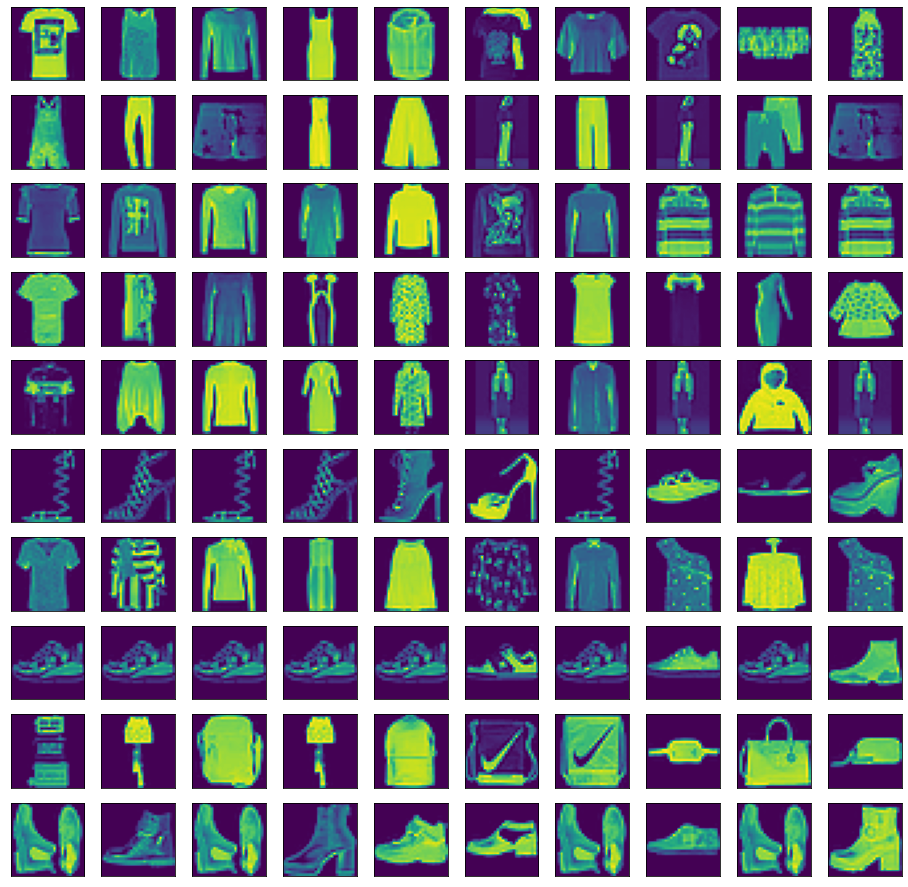

In [74]:
plt.figure(figsize=(16, 16))

for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_test_fmnist[matrix_objects[i // 10][i % 10]])

plt.show()